In [1]:
#EDA (Exploratory data analysis)

In [2]:
import pandas as pd

In [3]:
import ipywidgets as widgets

In [4]:
from pysentimiento.preprocessing import preprocess_tweet

In [5]:
#Helper Functions

In [6]:
# label to name
def label2name(x):
    if x == 0:
        return "Negative"
    if x == 1:
        return "Neutral"
    if x == 2:
        return "Positive"

In [7]:
#Read Data

In [8]:
# merging two csv files 
df = pd.concat( 
    map(pd.read_csv, ['data/raw_dataset-01.csv',
                      'data/raw_dataset-02.csv',
                      'data/raw_dataset-03.csv',
                      'data/raw_dataset-04.csv',
                      'data/raw_dataset-05.csv']), ignore_index=True) 
# print(df) 

# df = pd.read_csv(r'data/raw_dataset-01.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11867 entries, 0 to 11866
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    11867 non-null  object
 1   label   11867 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 185.5+ KB


In [9]:
import re
from typing import Union, List
import string

class CleanText():
    """ clearing text except digits () . , word character """ 

    def __init__(self, clean_pattern = r"[^A-ZĞÜŞİÖÇIa-zğüı'şöç0-9.\"',()]"):
        self.clean_pattern =clean_pattern

    def __call__(self, text: Union[str, list]) -> List[List[str]]:

        if isinstance(text, str):
            docs = [[text]]

        if isinstance(text, list):
            docs = text

        text = [[re.sub(self.clean_pattern, " ", sent) for sent in sents] for sents in docs]

        return text
    
def remove_emoji(data):
    emoj = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002500-\U00002BEF"  
        u"\U00002702-\U000027B0"
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        u"\U0001f926-\U0001f937"
        u"\U00010000-\U0010ffff"
        u"\u2640-\u2642" 
        u"\u2600-\u2B55"
        u"\u200d"
        u"\u23cf"
        u"\u23e9"
        u"\u231a"
        u"\ufe0f"  # dingbats
        u"\u3030"
                      "]+", re.UNICODE)
    return re.sub(emoj, '', data)

def tokenize(text):
    """ basic tokenize method with word character, non word character and digits """
    text = re.sub(r" +", " ", str(text))
    text = re.split(r"(\d+|[a-zA-ZğüşıöçĞÜŞİÖÇ]+|\W)", text)
    text = list(filter(lambda x: x != '' and x != ' ', text))
    sent_tokenized = ' '.join(text)
    return sent_tokenized

regex = re.compile('[%s]' % re.escape(string.punctuation))

def remove_punct(text):
    text = regex.sub(" ", text)
    return text

clean = CleanText()

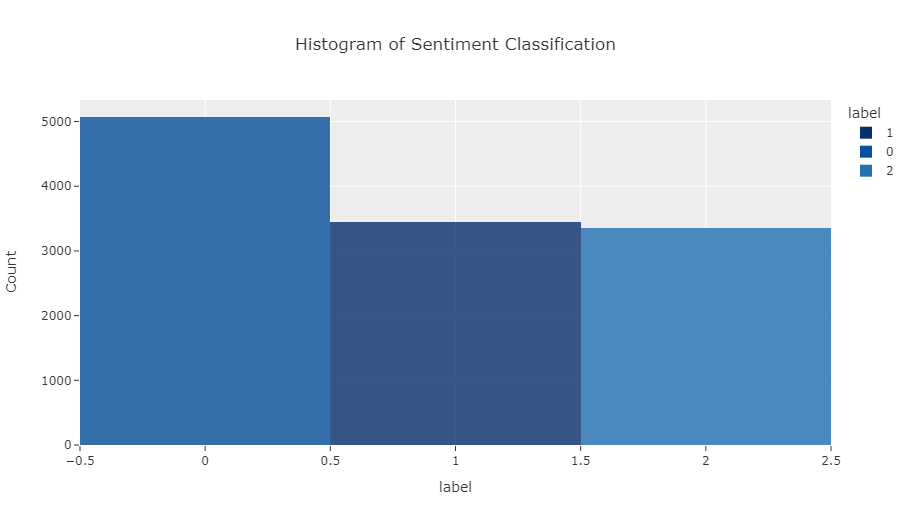

In [10]:
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
from plotly.offline import plot

# count of ratings
fig = px.histogram(df,
             x = 'label',
             title = 'Histogram of Sentiment Classification',
             template = 'ggplot2',
             color = 'label',
             color_discrete_sequence= px.colors.sequential.Blues_r,
             opacity = 0.8,
             height = 525,
             width = 835,
            )

fig.update_yaxes(title='Count')
fig.show()

In [11]:
# encode label and mapping label name
#df["label"] = df["label"].apply(lambda x: label_encode(x))
df["label_name"] = df["label"].apply(lambda x: label2name(x))

In [12]:
# clean text, lowercase and remove punk
df["text"] = df["text"].apply(lambda x: preprocess_tweet(x, demoji=False))

In [13]:
df.head()

text  label label_name
0    Oe Chacal      1    Neutral
1    Anda vete      0   Negative
2   a la firme      1    Neutral
3   Chau, cojo      0   Negative
4  Tengo plata      1    Neutral

In [14]:
df.sample(n = 30)

text  label label_name
5145            El mundo es nuestro.️👍 Viajaré si o si.😆      2   Positive
4630             Brighid más amanecidas q un wachiman 😂😂      2   Positive
7380   Stefany Csoto para mis 152 😆😁, no es tan caro,...      2   Positive
5723   Con esa porquería de canciones ya quemaron el ...      0   Negative
8478   Esperemos que esta vez si sean justo y no haga...      0   Negative
2638   James Pappa part 2. Jjaja. Los coment son la c...      2   Positive
11073                            Tombo no come tombo 🤮🤮🤮      0   Negative
8343               Empezó bien, más viejo más ridiculo 😫      0   Negative
7617   Verano huele a sandía, a mango, a bloqueador, ...      2   Positive
374                    Quédate con esa plata y déjame ir      0   Negative
11231  Calla perro hambriento no te llenas con lo que...      0   Negative
10409  Jamás un Marciano, volverá en sí, es de otro P...      0   Negative
7220                                Lau yala!!! Tsss 😏😏😏      2   Positive
10801  K@usuario LA B3T0 XQ TE FUISTE A MÉXICO Si ere...      0   Negative
2210   DOS DÍAS ATRÁS BETO DURANTE TODO SU PROGRAMA H...      1    Neutral
2961   Jjaja el chiste se cuenta solo cuando se compa...      0   Negative
9130   Bakan tu video pero el chambar es riko pero pa...      2   Positive
5926   Franco Guerrero  viste el programa ya que tant...      1    Neutral
1833   Betito betito ayayay se te viene el calvario. ...      0   Negative
6709   Hola mi querida Yidda t sigo desde Combate ben...      2   Positive
6623   Igual se me antojo la que más te gustó, pollo🤤...      1    Neutral
1427   Salud ps cuevita que riko los webeas a tus fie...      0   Negative
5030   Creo que debes hacer recetas  económicas  para...      2   Positive
3119                              Esa jato de calichin 🤣      0   Negative
4391   Que hombre más ordinario,eso es un cantante? P...      0   Negative
9777   Porque críticar si ella lleva a cabo la extrac...      2   Positive
5416   Ya basta pir favor Beto. Ya sabemos!!  H Eres ...      0   Negative
8418   Romina Chacaliaza Rios IMAGINATE COMER CON EST...      2   Positive
5009                    Que. Bien. Regreso. Chibolon 😂😂😂      1    Neutral
4921   La Usurpadora ️ cuando aún no se había fregado...      0   Negative

In [15]:
#Visualizations

In [16]:
#Word Cloud

In [17]:
from wordcloud import WordCloud


In [18]:

import matplotlib.gridspec as gridspec
from matplotlib.ticker import MaxNLocator
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt

In [19]:

import nltk
from nltk.corpus import stopwords
nltk.download("stopwords")
stopwords = set(stopwords.words('spanish', 'english'))
stopwords.update([ "x", "xq","q","k","Jajajaa","perra","kieren","verga","jaja"])
def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color='black',
        stopwords = stopwords,
        max_words=200,
        max_font_size=40, 
        scale=1,
        random_state=1
).generate(" ".join(data))

    fig = plt.figure(1, figsize=(15, 15))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\JairL\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


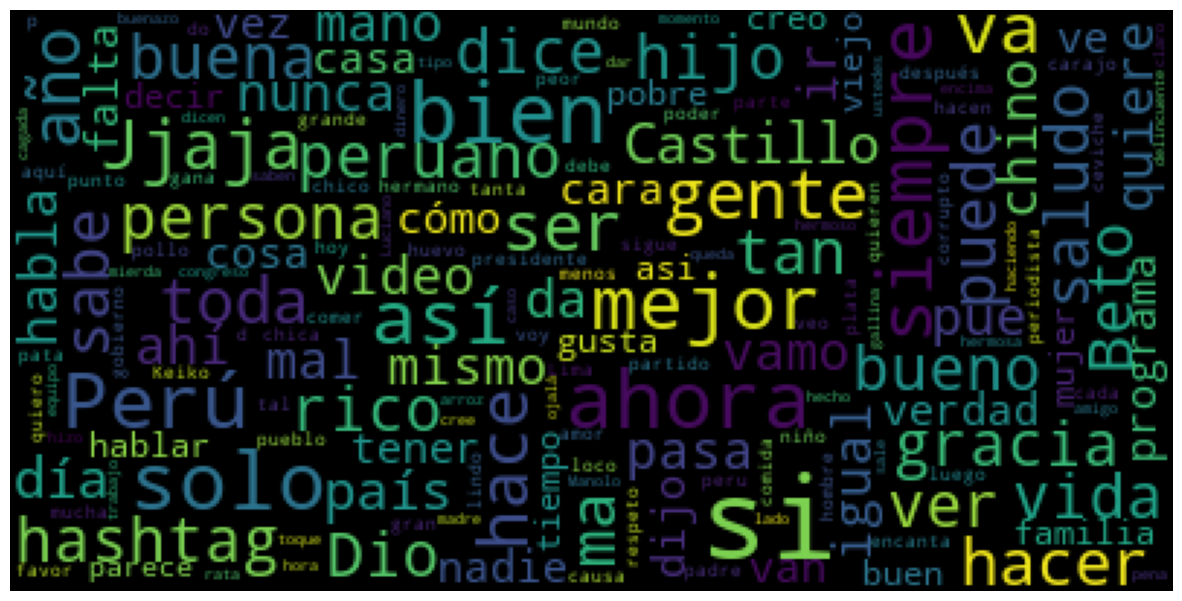

In [20]:
show_wordcloud(df["text"].values)

In [21]:
#Target Count

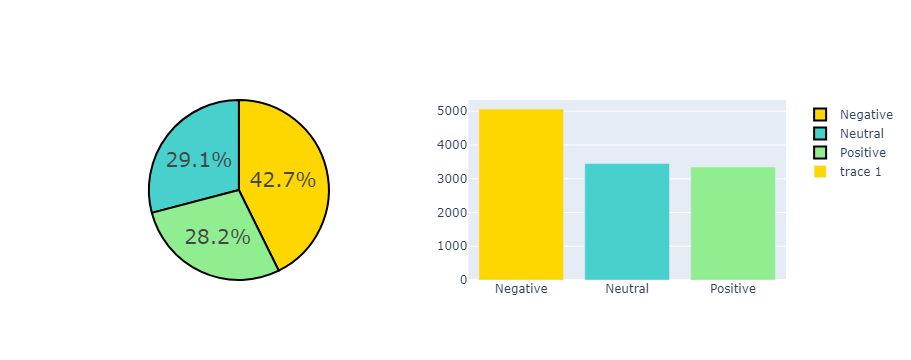

In [22]:
fig = make_subplots(rows=1, cols=2, specs=[[{"type": "pie"}, {"type": "bar"}]])
colors = ['gold', 'mediumturquoise', 'lightgreen'] # darkorange
fig.add_trace(go.Pie(labels=df.label_name.value_counts().index,
                             values=df.label.value_counts().values), 1, 1)

fig.update_traces(hoverinfo='label+percent', textfont_size=20,
                  marker=dict(colors=colors, line=dict(color='#000000', width=2)))

fig.add_trace(go.Bar(x=df.label_name.value_counts().index, y=df.label.value_counts().values, marker_color = colors), 1,2)

fig.show()

In [23]:
#Token Counts with simple tokenizer¶


In [24]:
# tokenize data
#df["tokenized_text"] = df.text.apply(lambda x: tokenize(x))
df["tokenized_text"] = df.text.apply(lambda x: preprocess_tweet(x, demoji=False))
# calculate token count for any sent
df["sent_token_length"] = df["tokenized_text"].apply(lambda x: len(x.split()))

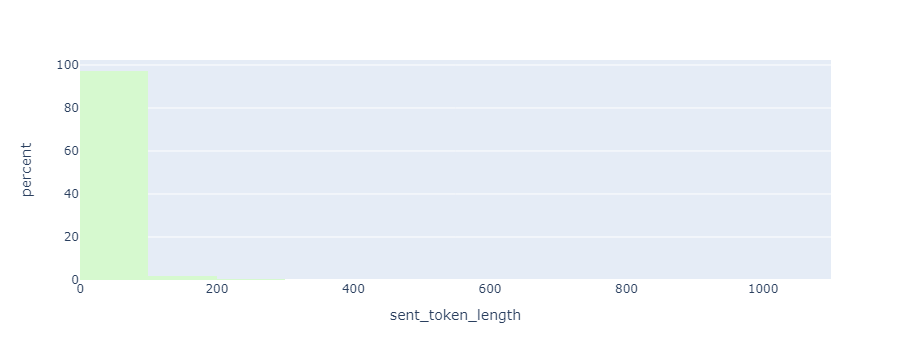

In [25]:
fig = px.histogram(df, x="sent_token_length", nbins=20, color_discrete_sequence=px.colors.cmocean.algae, barmode='group', histnorm="percent")
fig.show()

In [26]:
(df.sent_token_length < 200).mean()

0.9921631414847898

In [27]:
#Token Counts with roBERTuito tokenizer

In [28]:
from transformers import AutoTokenizer
model_name = "pysentimiento/robertuito-base-uncased"
tokenizer = AutoTokenizer.from_pretrained(model_name)

In [29]:
# data tokenize with bert tokenizer
df["sent_bert_token_length"] = df["text"].apply(lambda x: len(tokenizer(x, add_special_tokens=False)["input_ids"]))

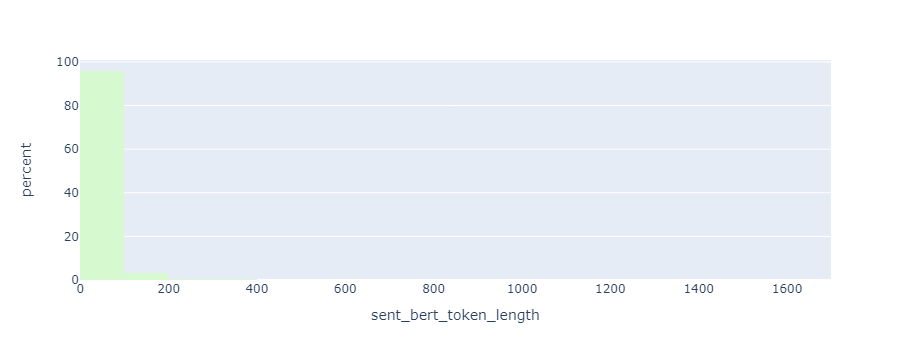

In [30]:
fig = px.histogram(df, x="sent_bert_token_length", nbins=20, color_discrete_sequence=px.colors.cmocean.algae, barmode='group', histnorm="percent")
fig.show()

In [31]:
# Less than 512 covers how many of the data
(df.sent_bert_token_length < 200).mean()

0.9894665880171906

In [32]:
#Characters Count in the Data

In [33]:

# valvulate char count for each review
df['char_count'] = df['text'].apply(lambda x: len(str(x)))

import seaborn as sns
def plot_dist3(df, feature, title):
    fig = plt.figure(constrained_layout=True, figsize=(18, 8))
    grid = gridspec.GridSpec(ncols=3, nrows=3, figure=fig)
    ax1 = fig.add_subplot(grid[0, :2])
    ax1.set_title('Histogram')
    sns.distplot(df.loc[:, feature],
                 hist=True,
                 kde=True,
                 ax=ax1,
                 )
    ax1.set(ylabel='Frequency')
    ax1.xaxis.set_major_locator(MaxNLocator(nbins=20))


    plt.suptitle(f'{title}', fontsize=24)

C:\Users\JairL\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



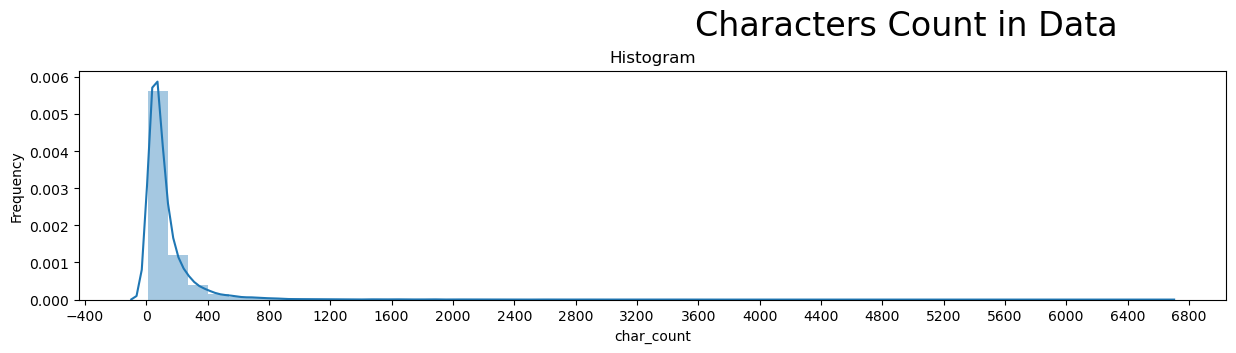

In [34]:
plot_dist3(df, 'char_count',
           'Characters Count in Data')

In [35]:
#Reviews Lengths

In [36]:
# Creating a new feature for the visualization.
df['Character Count'] = df['text'].apply(lambda x: len(str(x)))


def plot_dist3(df, feature, title):
    # Creating a customized chart. and giving in figsize and everything.
    fig = plt.figure(constrained_layout=True, figsize=(24, 12))
    # Creating a grid of 3 cols and 3 rows.
    grid = gridspec.GridSpec(ncols=3, nrows=3, figure=fig)

    # Customizing the histogram grid.
    ax1 = fig.add_subplot(grid[0, :2])
    # Set the title.
    ax1.set_title('Histogram')
    # plot the histogram.
    sns.distplot(df.loc[:, feature],
                 hist=True,
                 kde=True,
                 ax=ax1,
                 color='#e74c3c')
    ax1.set(ylabel='Frequency')
    ax1.xaxis.set_major_locator(MaxNLocator(nbins=20))

    # Customizing the ecdf_plot.
    ax2 = fig.add_subplot(grid[1, :2])
    # Set the title.
    ax2.set_title('Empirical CDF')
    # Plotting the ecdf_Plot.
    sns.distplot(df.loc[:, feature],
                 ax=ax2,
                 kde_kws={'cumulative': True},
                 hist_kws={'cumulative': True},
                 color='#e74c3c')
    ax2.xaxis.set_major_locator(MaxNLocator(nbins=20))
    ax2.set(ylabel='Cumulative Probability')

    plt.suptitle(f'{title}', fontsize=24)

C:\Users\JairL\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

C:\Users\JairL\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



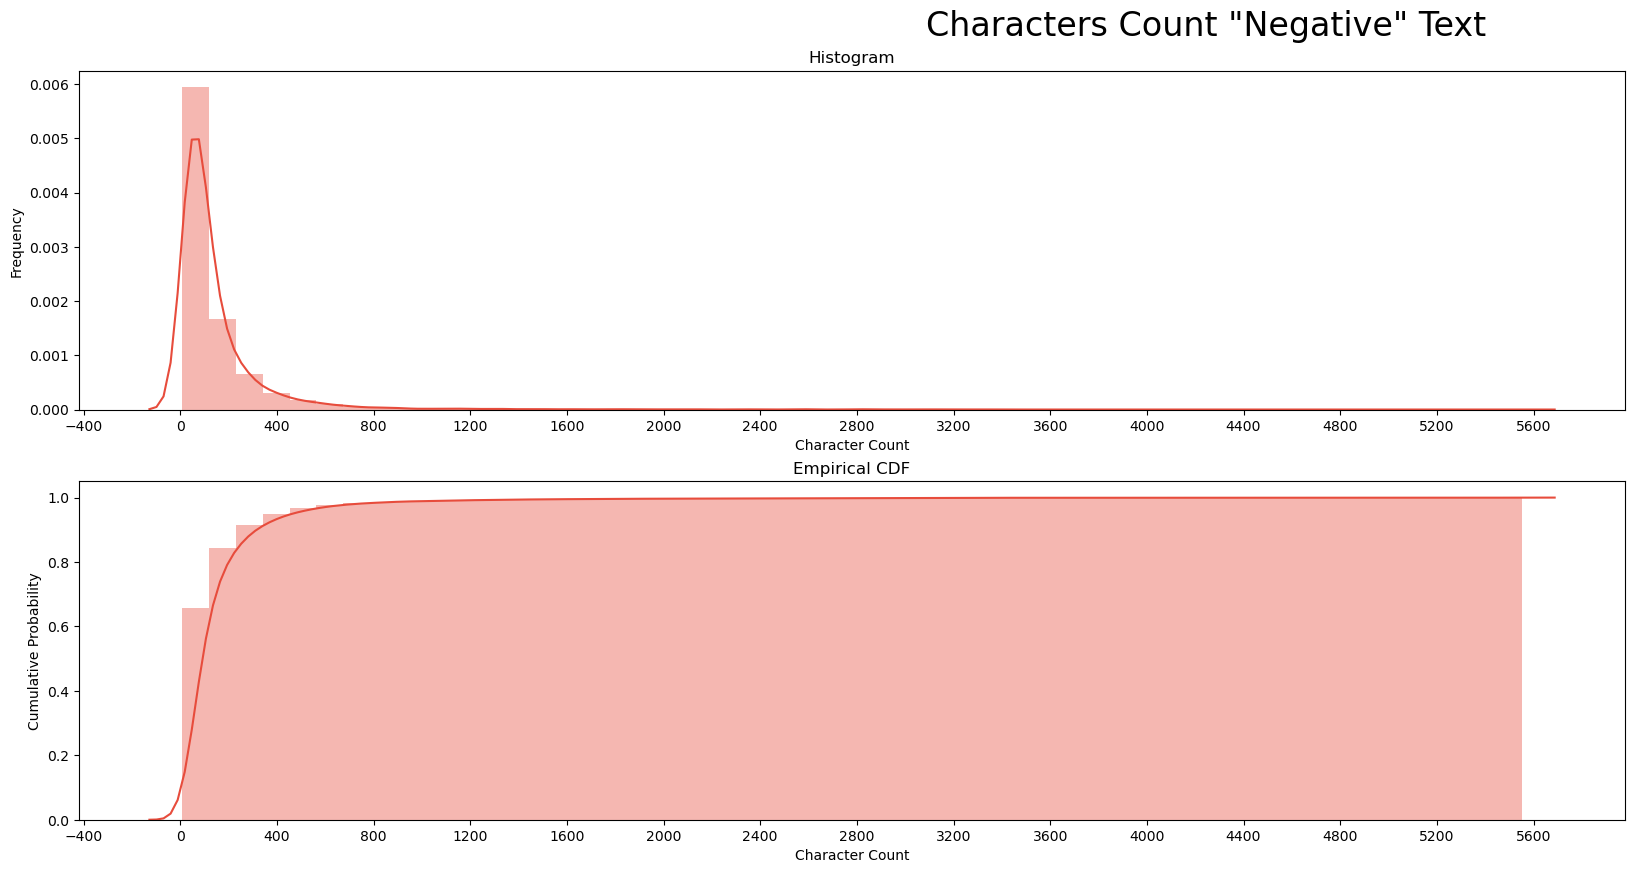

In [37]:
plot_dist3(df[df['label'] == 0], 'Character Count',
           'Characters Count "Negative" Text')

C:\Users\JairL\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

C:\Users\JairL\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



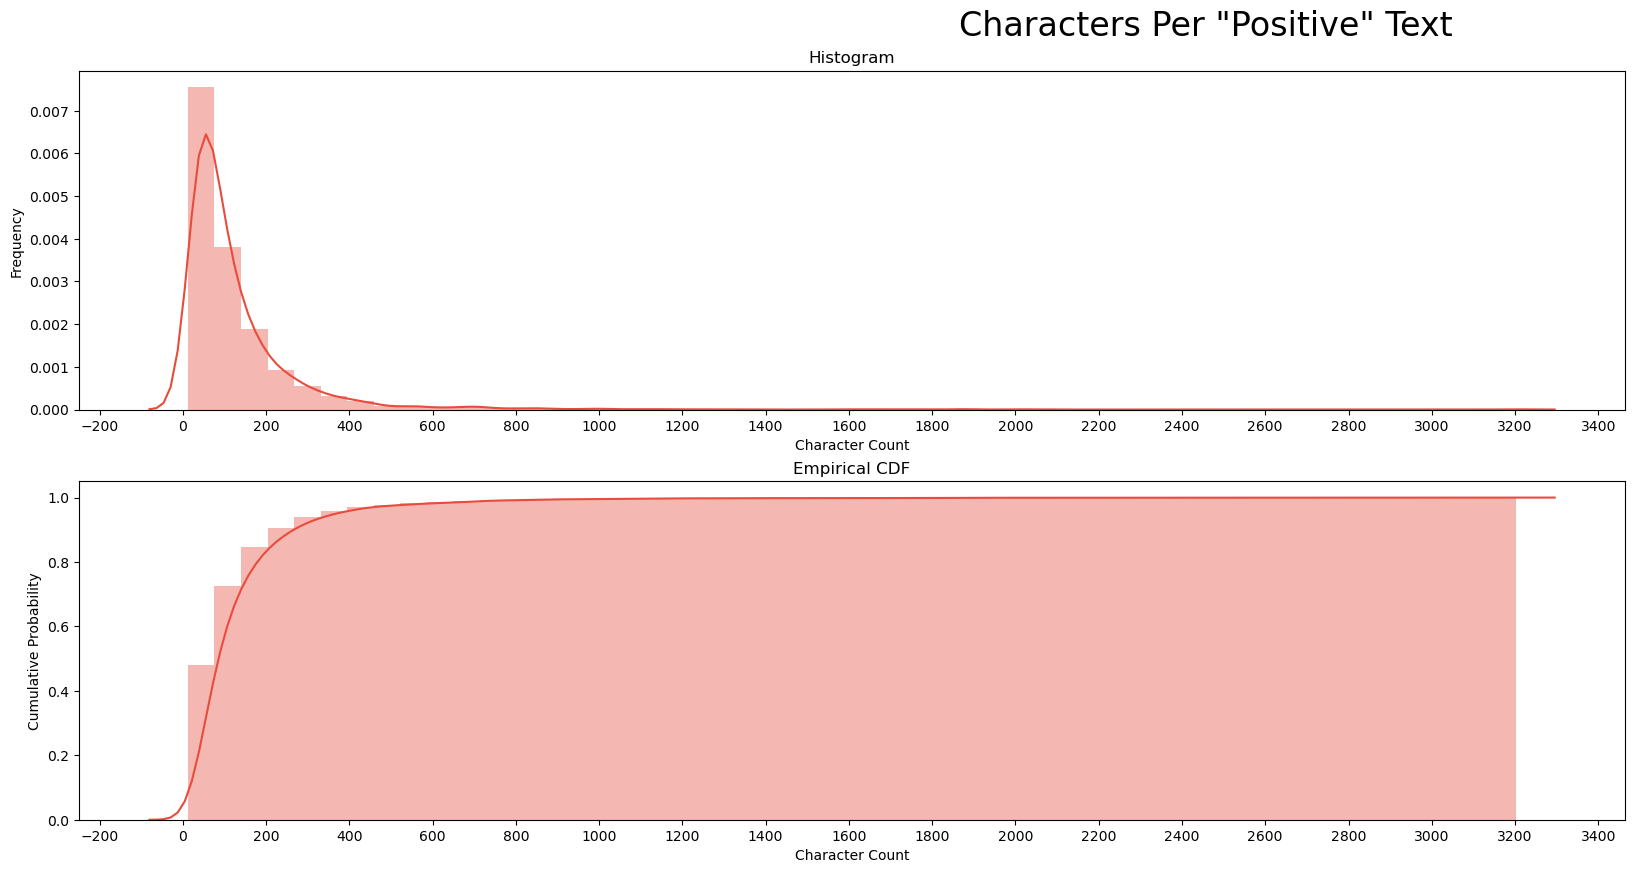

In [38]:
plot_dist3(df[df['label'] == 2], 'Character Count',
           'Characters Per "Positive" Text')

C:\Users\JairL\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

C:\Users\JairL\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



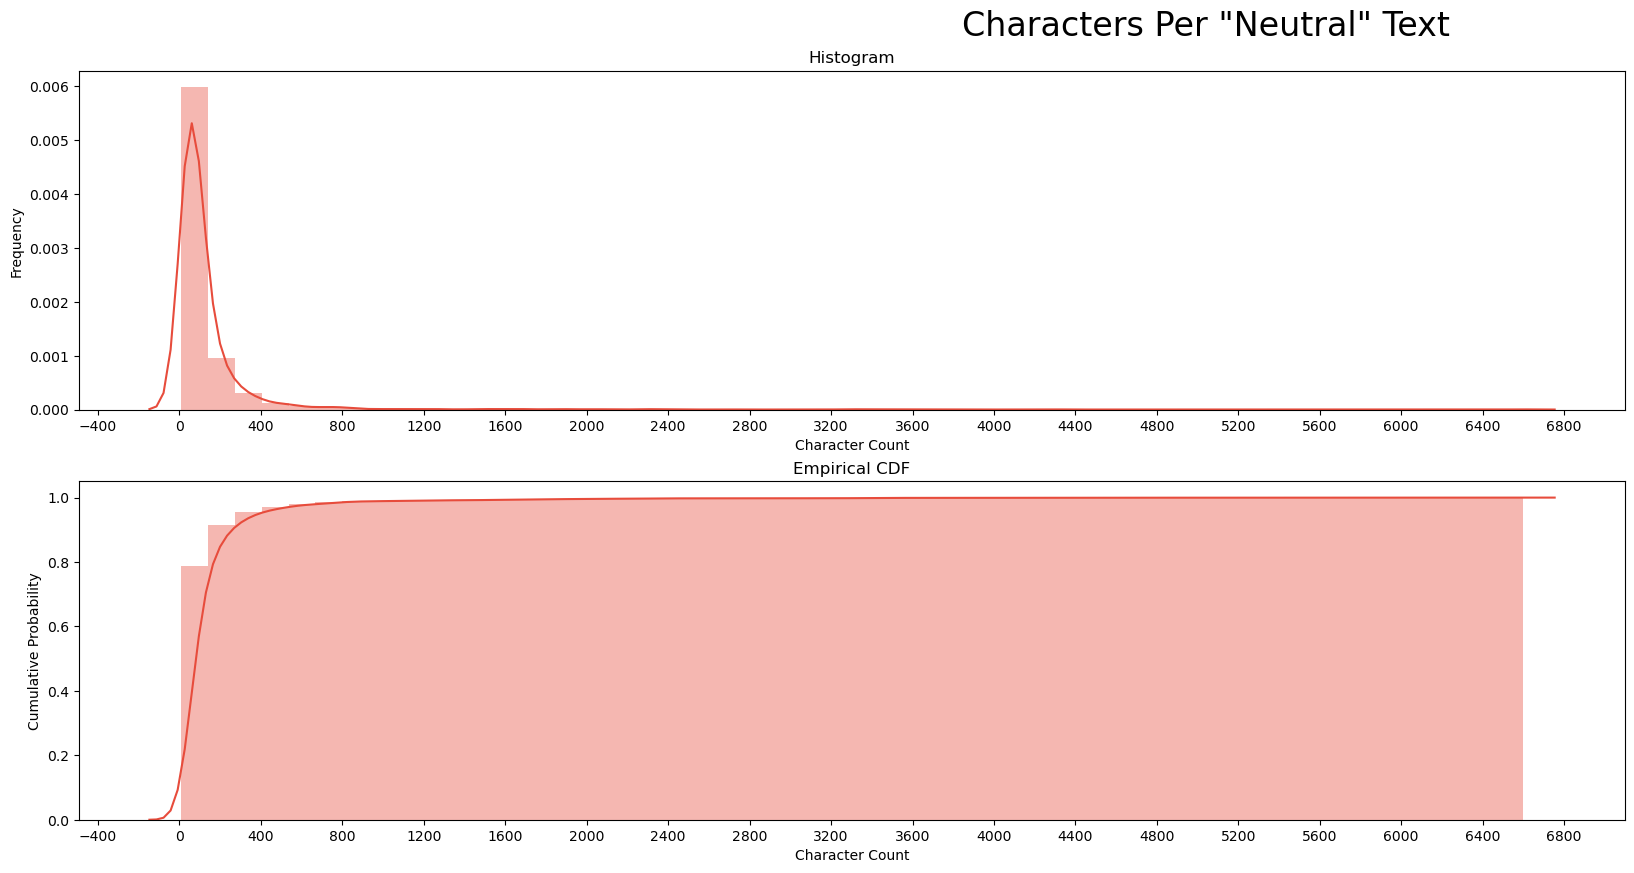

In [39]:
plot_dist3(df[df['label'] == 1], 'Character Count',
           'Characters Per "Neutral" Text')

In [40]:
#Word Counts

In [41]:
def plot_word_number_histogram(textno, textye, textz):
    
    """A function for comparing word counts"""

    fig, axes = plt.subplots(ncols=1, nrows=3, figsize=(18, 12), sharey=True)
    sns.distplot(textno.str.split().map(lambda x: len(x)), ax=axes[0], color='#e74c3c')
    sns.distplot(textye.str.split().map(lambda x: len(x)), ax=axes[1], color='#e74c3c')
    sns.distplot(textz.str.split().map(lambda x: len(x)), ax=axes[2], color='#e74c3c')

    
    axes[0].set_xlabel('Word Count')
    axes[0].set_ylabel('Frequency')
    axes[0].set_title('negative')
    axes[1].set_xlabel('Word Count')
    axes[1].set_title('netrual')
    axes[2].set_xlabel('Word Count')
    axes[2].set_title('pozitive')
    
    fig.suptitle('Words Per Review', fontsize=24, va='baseline')
    
    fig.tight_layout()

C:\Users\JairL\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

C:\Users\JairL\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

C:\Users\JairL\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



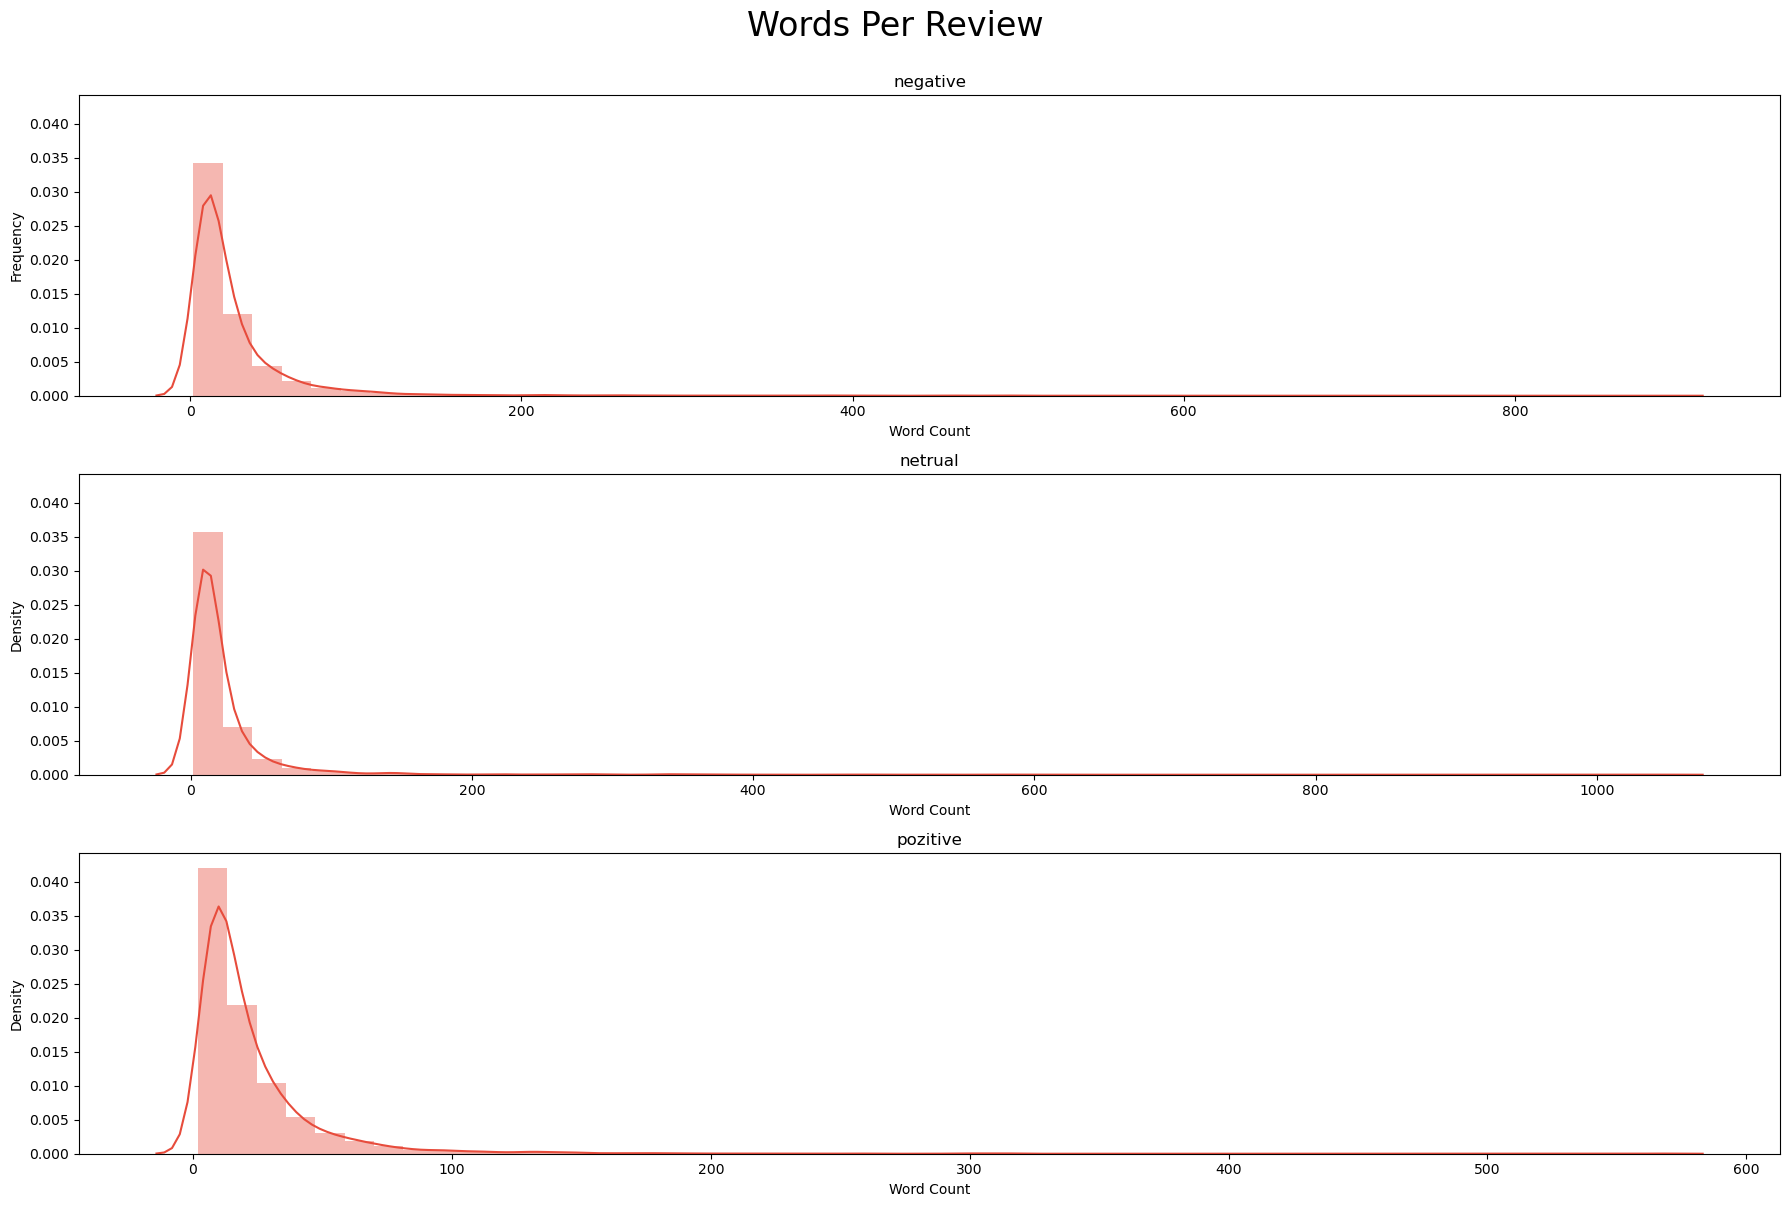

In [42]:
plot_word_number_histogram(df[df['label'] == 0]['text'],
                           df[df['label'] == 1]['text'],
                           df[df['label'] == 2]['text'],
                          )

In [43]:
# remove punk 
df['tokenized_text'] = df['tokenized_text'].apply(lambda x: remove_punct(x))

In [44]:
df['tokenized_text'].sample(40)

8530     Osea porqué  es presidente  va a ser lo que da...
3125     Por lo general la gallina que usan estan inyec...
7193     Ronaldo Rodriguez  Jjaja Yara Trankilo Pe Tili...
5885     Doris Ivonne Seguil Basilio     ahora que bail...
6781       Flaite en Chile será igual que Faite en Perú  🤔
9234     El delicioso y clasico arroz con pollo siempre...
4378       Junior León anda sacando tu libro de notas  😁😁😉
11396    JAJAJAJA Valeria Meza Ramiro Rodriguez Muñoz😂 ...
7404     Desde Cocachimba 2 horas    Y fui caminando  U...
2793                               Unos anticuchos chino 😅
7883     Transmisión en vivo pues 👉👈 te espera la salch...
5755     Bien cabeza de guaipe 😂 tu si eres un reviente 😁✌
6437                       Chino este ampay tenkantala 🤣🤣🤣
6038     DEJEN GOBERNAR CARJ    Solo defienden los inte...
8106                       Jjaja ya mamacita tranquila 🥺🥺🥺
3080     Concuerdo con todas la opinionesde la hinchada...
748        te estimaba mucho nuestro querido viejo Rosen

In [45]:
pd.set_option("max_colwidth", 200)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\JairL\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


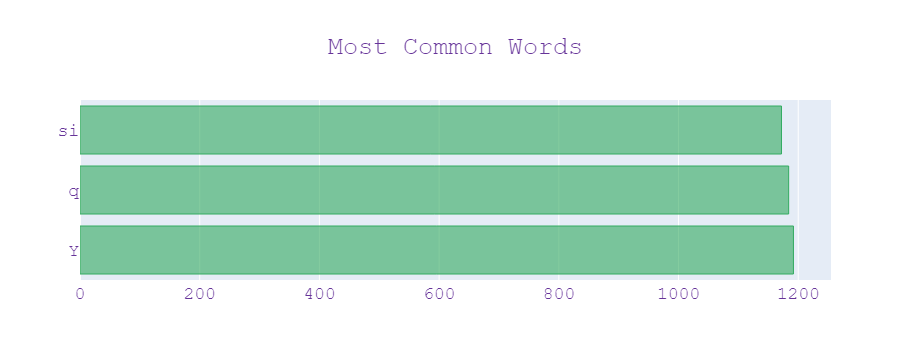

In [46]:
from collections import Counter, defaultdict

import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stopWords_nltk = set(stopwords.words('spanish'))
# stopWords_nltk.update([ "x", "xq","q","k","Jajajaa","perra","kieren","verga","jaja", 'si', 'Y'])

texts = df['tokenized_text']
new = texts.str.split()
new = new.values.tolist()
corpus = [word for i in new for word in i]
counter = Counter(corpus)
most = counter.most_common()
x, y = [], []
for word, count in most[:30]:
    if word not in stopWords_nltk:
        x.append(word)
        y.append(count)

fig = go.Figure(go.Bar(
            x=y,
            y=x,
            orientation='h',  marker=dict(
        color='rgba(50, 171, 96, 0.6)',
        line=dict(
            color='rgba(50, 171, 96, 1.0)',
            width=1),
    ),
    name='Most common Word',))

fig.update_layout( title={
        'text': "Most Common Words",
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'}, font=dict(
        family="Courier New, monospace",
        size=18,
        color="RebeccaPurple"
    ))

fig.show()

In [47]:
#Most Common ngrams

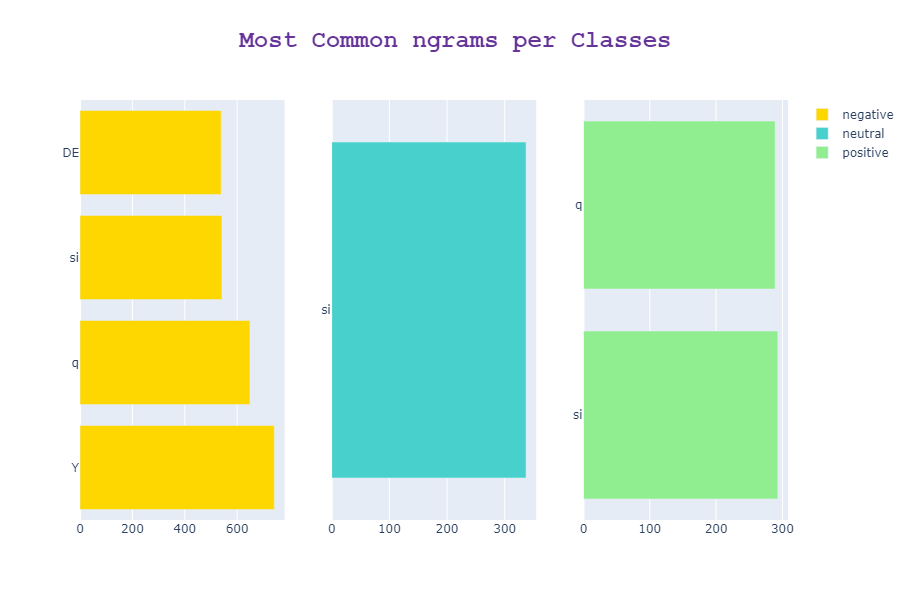

In [48]:
fig = make_subplots(rows=1, cols=3)
title_ = ["negative", "neutral", "positive"]

for i in range(3):
    texts = df[df["label"] == i]['tokenized_text']

    new = texts.str.split()
    new = new.values.tolist()
    corpus = [word for i in new for word in i]
    counter = Counter(corpus)
    most = counter.most_common()
    x, y = [], []

    for word, count in most[:30]:
        if word not in stopWords_nltk:
            x.append(word)
            y.append(count)

    fig.add_trace(go.Bar(
                x=y,
                y=x,
                orientation='h', type="bar",
        name=title_[i], marker=dict(color=colors[i])), 1, i+1)
    
fig.update_layout(
    autosize=False,
    width=2000,
    height=600,title=dict(
        text='<b>Most Common ngrams per Classes</b>',
        x=0.5,
        y=0.95,
        font=dict(
        family="Courier New, monospace",
        size=24,
        color="RebeccaPurple"
        )
    ),)


fig.show()

In [49]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
def _get_top_ngram(corpus, n=None):
    #getting top ngrams
    vec = CountVectorizer(ngram_range=(n, n),
                          max_df=0.9,
                          ).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx])
                  for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)
    return words_freq[:15]

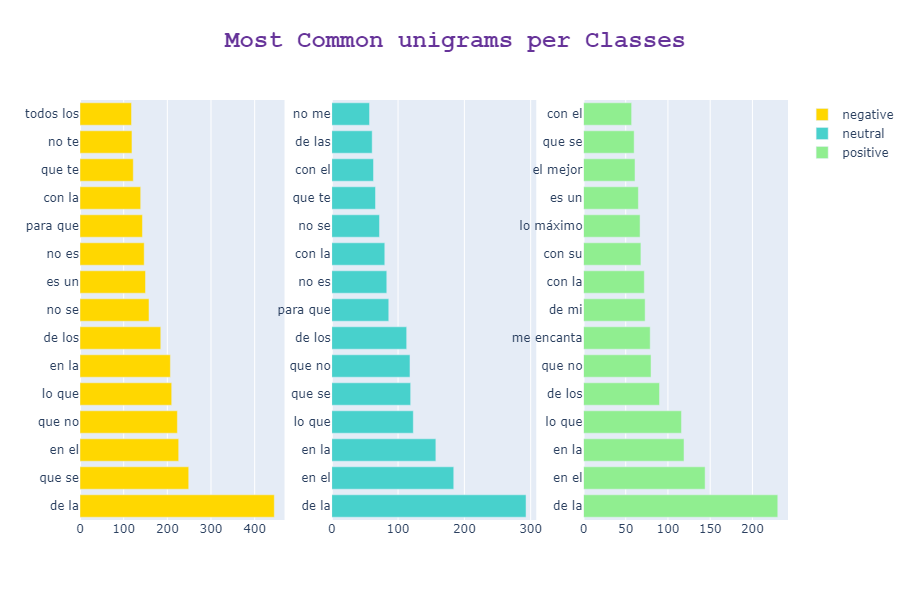

In [50]:
# unigram
fig = make_subplots(rows=1, cols=3)

title_ = ["negative", "neutral", "positive"]

for i in range(3):
    texts = df[df["label"] == i]['tokenized_text']

    new = texts.str.split()
    new = new.values.tolist()
    corpus = [word for i in new for word in i]
    top_n_bigrams = _get_top_ngram(texts, 2)[:15]
    x, y = map(list, zip(*top_n_bigrams))


    fig.add_trace(go.Bar(
                x=y,
                y=x,
                orientation='h', type="bar",
        name=title_[i], marker=dict(color=colors[i])), 1, i+1)
    

fig.update_layout(
    autosize=False,
    width=2000,
    height=600,title=dict(
        text='<b>Most Common unigrams per Classes</b>',
        x=0.5,
        y=0.95,
        font=dict(
        family="Courier New, monospace",
        size=24,
        color="RebeccaPurple"
        )
    ))      
fig.show()

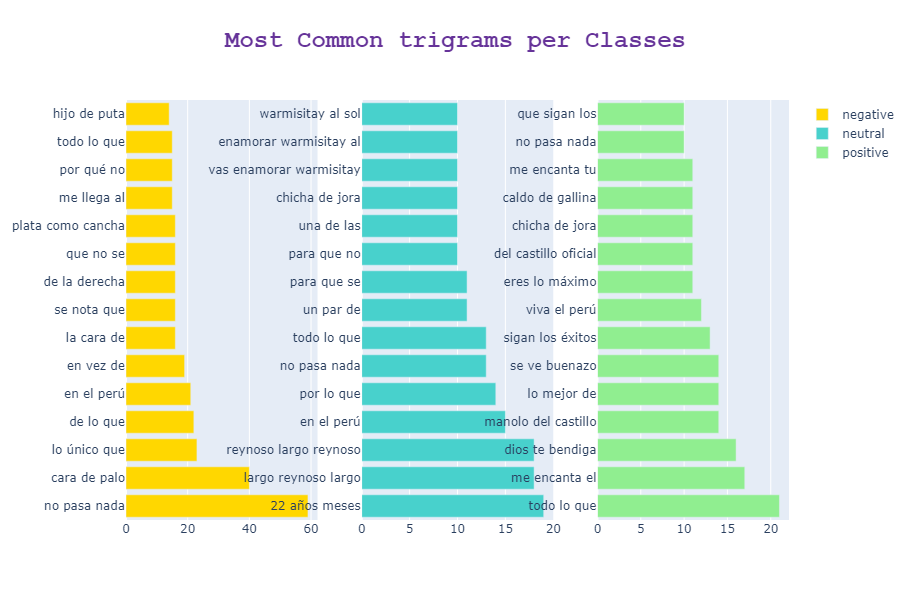

In [51]:
#trigram

fig = make_subplots(rows=1, cols=3)
title_ = ["negative", "neutral", "positive"]

for i in range(3):
    texts = df[df["label"] == i]['tokenized_text']

    new = texts.str.split()
    new = new.values.tolist()
    corpus = [word for i in new for word in i]

    top_n_bigrams = _get_top_ngram(texts, 3)[:15]
    x, y = map(list, zip(*top_n_bigrams))

    fig.add_trace(go.Bar(
                x=y,
                y=x,
                orientation='h', type="bar",
        name=title_[i], marker=dict(color=colors[i])), 1, i+1),

fig.update_layout(
    autosize=False,
    width=2000,
    height=600,title=dict(
        text='<b>Most Common trigrams per Classes</b>',
        x=0.5,
        y=0.95,
        font=dict(
        family="Courier New, monospace",
        size=24,
        color="RebeccaPurple"
        )
    ))
    
fig.show()

In [52]:
#split train test
from sklearn.model_selection import train_test_split


random_state=1
train_df_, val_df = train_test_split(df, 
                                    test_size=0.10, 
                                    random_state=random_state, 
                            stratify=df.label.values)

In [53]:

train_df, test_df = train_test_split(train_df_, 
                                    test_size=0.10, 
                                    random_state=42, 
                            stratify=train_df_.label.values)

In [54]:
train_df.to_csv('data/train.csv', index=False)
val_df.to_csv('data/val.csv', index=False)
test_df.to_csv('data/test.csv', index=False)

In [55]:
!ls -l

'ls' is not recognized as an internal or external command,
operable program or batch file.


In [56]:
len(train_df)

9612

In [57]:
len(test_df)

1068

In [58]:
len(val_df)

1187

In [59]:
df.sample(n = 30)

text  \
199                                                                                                                                                                                     El matón es su cachero   
8302                                                                                                                                                                          Moradito Palomilla de Balcon 😂😂😂   
4446                                                                                                                                                                       Ese niño RAULITO ES UN PENDEIVIS🤣🤣🤣   
11560                                                                                                                                                                     Todos son pendejos 😂 jaja coño joder   
6093                                                                                        Recuerdo que comí el más espectacular Tartar de trucha en el Colca Lodge, que bueno que ahora lo podré preparar 🤩😋   
10422                                                                                                                                                             Si vamos con todo💪💪💪🤗🙂 sobrado y llegamos💪💪💪   
10598                                                                                                                                                                                 Ayayayay  Huascarán  💯🇵🇪   
6028                                                                                                                                                                                que mostro! 😍 me encantan.   
5388                                                                                                                                                                         Que chévere tus videos ,saludos 👍   
10262                                                                                                                            Este renacuajo con su cara de we...es más 🐀🐀🐀que todos esos otorongos juntos.   
3070                                                                                                                                                                      Estoy entre Cachondo y Confundido  🧐   
4063                                                                                                                                            Papi tú que eres especialista en mariscos Haste un buen chupe️   
10317                                                                                          Eliminan a buenos artistas.. y siempre dejan a personas sin talento q solo son figuretis..!!!  Programa feo..👎🏻   
11827  Este atrevido Mermelero y Corrupto 🐀 está sediento de plata💰💰💰 se está volviendo LOCO a todos  ahora para  diciendo :  Querellame!!  Querellame pobre  mediocre Ahora este Mermelero  se cree  y soñ...   
9244                                                                                                                           Esa flaca está bonita mano la firme pitoca así la agarró como a ella le falta 😉   
6332                                                                      Alex Brayan Flores  tu causa Thiago Jose Maria Mendoza  es de arranque .. la tía veneno ... Y ahí al sobre a jugar las  ⚔️⚔️⚔️  😅🤣🤣🤣   
6407                                                                                                                                                                                       😄moriii😄😄😄 Regia!!!   
10193                                      Y eso fue solo un adelanto! ...y esto llegó gracias a una virtual nueva congresista  de Perú Libre!¡  Otra borrachita del poder y muestran realmente cómo son!¡ 🤮🤮🤮   
338                                                                                                                                                                             Mientes, serrano, no es verdad   
11